In [1]:
import sys
from pathlib import Path
sys.path.append('/Users/schoens/Documents/Projekte/Econ/Code/v3/')

import xarray as xr
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import config.settings as cset

In [2]:
gmt_df = pd.read_csv(cset.path_MESMER_char / f'gmt_dataset.csv', index_col=0)

In [3]:
focus_scenarios = ['ssp119', 'SP']

In [9]:
# metrics to display: 
i_scen = 0
gmt_trajectory     = gmt_df.loc[:, gmt_df.columns.str.contains(focus_scenarios[i_scen])].mean(axis = 1)
gmt_max_trajectory = gmt_trajectory.copy()
gmt_max_trajectory.iloc[np.argmax(gmt_trajectory):] = np.max(gmt_max_trajectory)
gmt_eoc_trajectory = gmt_trajectory.copy()
gmt_eoc_trajectory[gmt_eoc_trajectory >= gmt_trajectory.values[-1]] =  gmt_trajectory.values[-1]

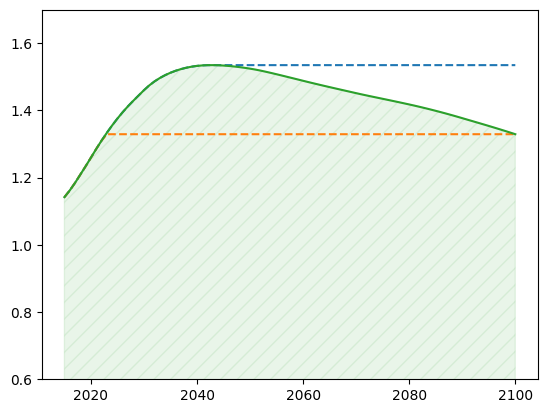

In [10]:
plt.figure()
plt.plot(gmt_max_trajectory.index, gmt_max_trajectory, linestyle=  '--')
plt.plot(gmt_eoc_trajectory.index, gmt_eoc_trajectory, linestyle=  '--')
plt.plot(gmt_trajectory.index, gmt_trajectory)
# plt.fill_between(gmt_trajectory.index, gmt_max_trajectory*0, gmt_eoc_trajectory, alpha = 0.1, color = 'C1', hatch = '||')
# plt.fill_between(gmt_trajectory.index, gmt_max_trajectory*0, gmt_max_trajectory, alpha = 0.1, color = 'C0', hatch = '..')
plt.fill_between(gmt_trajectory.index, gmt_max_trajectory*0, gmt_trajectory, alpha = 0.1, color = 'C2', hatch = '//')
plt.ylim(0.6,1.7)
plt.show()

In [15]:
scenarios = ['SP', 'Neg', 'GS', 'ssp534-over', 'CurPol']
# scenarios = ['ssp119', 'SP', 'GS', 'ssp534-over', 'CurPol']

list_gmt_ds = []
for i_scen in range(len(scenarios)):
    scenario = scenarios[i_scen]
    fair_ids_100  = pd.read_csv(f'/Users/schoens/Documents/Projekte/Econ/Data/FaIR_v1/ids_for_peter.csv', sep = ',')
    all_fair_runs = pd.read_csv(f'/Users/schoens/Documents/Projekte/Econ/Data/FaIR_v1/scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values]
    all_fair_runs.columns = np.arange(100)
    mesmer_ids = xr.load_dataset(f'/Users/schoens/Documents/Projekte/Econ/Data/MESMER/fldmean/{scenario}_fldmean.nc')['fair_esm_variability_realisation'].values
    fair_ids_mesmer = [int(f.split('_')[0]) for f in mesmer_ids]
    gmt_trajectories = all_fair_runs.loc[:, fair_ids_mesmer]
    gmt_trajectories.columns = np.arange(100)
    list_gmt_ds.append(gmt_trajectories)

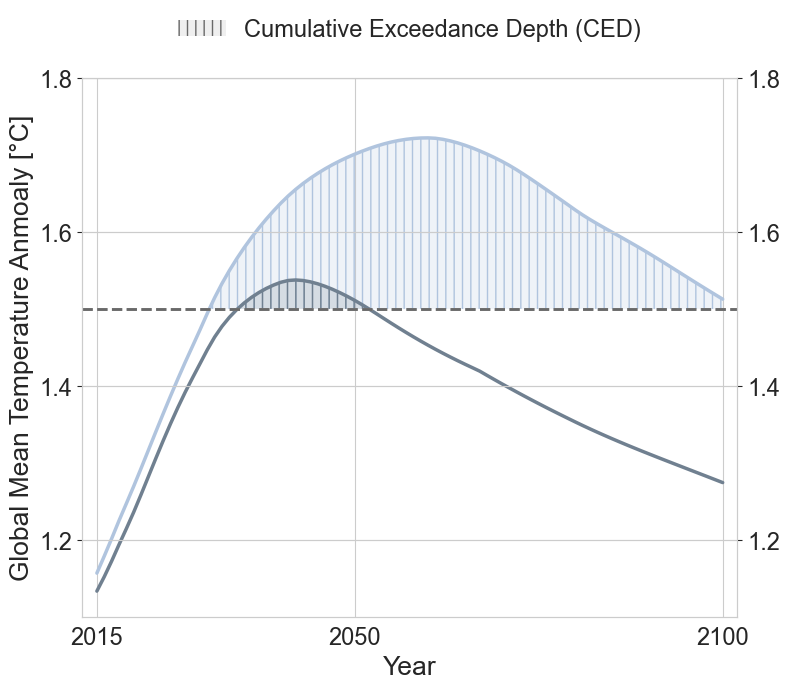

In [18]:
# plot gmt trajectories
cmap   = sns.color_palette("flare", as_cmap=True)
colors = cmap(np.linspace(0,1,len(scenarios)))
colors = ['#00BFFF', '#FFA500', '#ff571a', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#cb015c', '#692F6A']
colors = ['slategrey', 'lightsteelblue', '#ff571a', '#b3006e', '#692F6A']
t_ref = 1.5

x = np.linspace(2015, 2100, 86)
p = np.polyfit([2015, 2050, 2100], [1.1, 1.7, 1.1], 2)
gmt_stylised = p[0]*x**2 + p[1]*x + p[2]

labelsize_large = 19
labelsize_medium = 17
labelsize_small  = 17

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    
    i_scen  = 1
    scenario = scenarios[i_scen]
    gmt_trajectories = list_gmt_ds[i_scen].loc[slice(2015,2100), :].mean(axis = 1)
    ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = colors[i_scen], linewidth = 2.5)
    gmt_trajectories_adj = gmt_trajectories.copy()
    gmt_trajectories_adj[gmt_trajectories_adj < t_ref] = t_ref
    ax.fill_between(gmt_trajectories.index, np.repeat(t_ref, len(gmt_trajectories.index)), gmt_trajectories_adj.values, 
                    color = colors[i_scen], edgecolor = 'None', alpha = .2, hatch = '||')    
    gmt_trajectories_adj = gmt_trajectories.copy()
    gmt_trajectories_adj[gmt_trajectories_adj > t_ref] = t_ref
    # ax.fill_between(gmt_trajectories.index, np.repeat(t_ref, len(gmt_trajectories.index)), gmt_trajectories_adj.values, 
    #                 color = colors[i_scen], edgecolor = 'None', alpha = .2, hatch = '..')
    
    i_scen  = 0
    scenario = scenarios[i_scen]
    gmt_trajectories = list_gmt_ds[i_scen].loc[slice(2015,2100), :].mean(axis = 1)
    gmt_trajectories.iloc[52:] *= np.linspace(0.9999,0.97, 34)
    ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = colors[i_scen], linewidth = 2.5)
    ax.axhline(t_ref, linestyle = '--', color = 'darkgrey', linewidth = 2)
    gmt_trajectories_adj = gmt_trajectories.copy()
    gmt_trajectories_adj[gmt_trajectories_adj < t_ref] = t_ref
    ax.fill_between(gmt_trajectories.index, np.repeat(t_ref, len(gmt_trajectories.index)), gmt_trajectories_adj.values, 
                    color = colors[i_scen], edgecolor = 'None', alpha = .2, hatch = '||')    
    gmt_trajectories_adj = gmt_trajectories.copy()
    gmt_trajectories_adj[gmt_trajectories_adj > t_ref] = t_ref
    # ax.fill_between(gmt_trajectories.index, np.repeat(t_ref, len(gmt_trajectories.index)), gmt_trajectories_adj.values, 
    #                 color = colors[i_scen], edgecolor = 'None', alpha = .2, hatch = '..')
    
    ax.fill_between(gmt_trajectories.index, 0, 0, 
                    color = 'dimgrey', edgecolor = 'None', alpha = .1, hatch = '||', label = 'Cumulative Exceedance Depth (CED)')    
    
    # ax.fill_between(gmt_trajectories.index, 0, 0, 
    #                 color = 'dimgrey', edgecolor = 'None', alpha = .1, hatch = '..', label = 'Cumulative Undershoot Depth (CUD)')    
    ax.axhline(t_ref, linestyle = '--', color = 'dimgrey', linewidth = 2)
    # i_scen  = 4
    # scenario = scenarios[i_scen]
    # ax.plot(x, gmt_stylised, color = colors[i_scen], linewidth = 2.5, label = 'GMT trajectory')
    # ax.axhline(t_ref, linestyle = '--', color = 'darkgrey', linewidth = 2)
    # gmt_stylised_adj = gmt_stylised.copy()
    # gmt_stylised_adj[gmt_stylised_adj < t_ref] = t_ref
    # ax.fill_between(x, np.repeat(t_ref, len(gmt_stylised)), gmt_stylised_adj, 
    #                 color = colors[i_scen], edgecolor = 'None', alpha = .1, hatch = '|', label = 'CED')    
    # gmt_stylised_adj = gmt_stylised.copy()
    # gmt_stylised_adj[gmt_stylised_adj > t_ref] = t_ref
    # ax.fill_between(x, np.repeat(t_ref, len(x)), gmt_stylised_adj, 
    #                 color = colors[i_scen], edgecolor = 'None', alpha = .1, hatch = '.', label = 'CUD')
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = labelsize_small)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6, 1.8])
    ax.set_yticklabels([1.0, 1.2, 1.4, 1.6, 1.8], fontsize =  labelsize_small)
    ax0 = ax.twinx()
    ax0.set_yticks([1.0, 1.2, 1.4, 1.6, 1.8])
    ax0.set_yticklabels([1.0, 1.2, 1.4, 1.6, 1.8], fontsize =  labelsize_small)
    ax0.set_ylim(1.1, 1.8)
    ax.set_ylim(1.1, 1.8)
    ax.set_xlim(2013,2102)
    ax.set_xlabel('Year', fontsize = labelsize_large)
    ax.set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = labelsize_large)
    ax.legend(ncol = 1, fontsize = labelsize_medium, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    plt.tight_layout()
    plt.show()

In [16]:
scenarios = ['Ren', 'Neg', 'GS', 'ssp534-over', 'CurPol']
# scenarios = ['ssp119', 'SP', 'GS', 'ssp534-over', 'CurPol']

list_gmt_ds = []
for i_scen in range(len(scenarios)):
    scenario = scenarios[i_scen]
    fair_ids_100  = pd.read_csv(cset.path_FAIR / 'ids_for_peter.csv', sep = ',')
    all_fair_runs = pd.read_csv(cset.path_FAIR / f'scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values]
    all_fair_runs.columns = np.arange(100)
    mesmer_ids = xr.load_dataset(cset.path_MESMER_fldmean / f'{scenario}_fldmean.nc')['fair_esm_variability_realisation'].values
    fair_ids_mesmer = [int(f.split('_')[0]) for f in mesmer_ids]
    gmt_trajectories = all_fair_runs.loc[:, fair_ids_mesmer]
    gmt_trajectories.columns = np.arange(100)
    list_gmt_ds.append(gmt_trajectories)

In [6]:
# plot gmt trajectories
cmap   = sns.color_palette("flare", as_cmap=True)
colors = cmap(np.linspace(0,1,len(scenarios)))
colors = ['#00BFFF', '#FFA500', '#ff571a', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#cb015c', '#692F6A']
colors = ['slategrey', 'lightsteelblue', '#ff571a', '#b3006e', '#692F6A']
t_ref = 1.5

x = np.linspace(2015, 2100, 86)
p = np.polyfit([2015, 2050, 2100], [1.1, 1.7, 1.1], 2)
gmt_stylised = p[0]*x**2 + p[1]*x + p[2]

labelsize_large = 19
labelsize_medium = 17
labelsize_small  = 17

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    
    i_scen  = 1
    scenario = scenarios[i_scen]
    gmt_trajectories = list_gmt_ds[i_scen].loc[slice(2015,2100), :].mean(axis = 1)
    ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = colors[i_scen], linewidth = 2.5)
    gmt_trajectories_adj = gmt_trajectories.copy()
    gmt_trajectories_adj[gmt_trajectories_adj < t_ref] = t_ref
    ax.fill_between(gmt_trajectories.index, np.repeat(t_ref, len(gmt_trajectories.index)), gmt_trajectories_adj.values, 
                    color = colors[i_scen], edgecolor = 'None', alpha = .2, hatch = '||')    
    gmt_trajectories_adj = gmt_trajectories.copy()
    gmt_trajectories_adj[gmt_trajectories_adj > t_ref] = t_ref
    ax.fill_between(gmt_trajectories.index, np.repeat(t_ref, len(gmt_trajectories.index)), gmt_trajectories_adj.values, 
                    color = colors[i_scen], edgecolor = 'None', alpha = .2, hatch = '..')
    
    i_scen  = 0
    scenario = scenarios[i_scen]
    gmt_trajectories = list_gmt_ds[i_scen].loc[slice(2015,2100), :].mean(axis = 1)
    gmt_trajectories.iloc[52:] *= np.linspace(0.9999,0.97, 34)
    ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = colors[i_scen], linewidth = 2.5)
    ax.axhline(t_ref, linestyle = '--', color = 'darkgrey', linewidth = 2)
    gmt_trajectories_adj = gmt_trajectories.copy()
    gmt_trajectories_adj[gmt_trajectories_adj < t_ref] = t_ref
    ax.fill_between(gmt_trajectories.index, np.repeat(t_ref, len(gmt_trajectories.index)), gmt_trajectories_adj.values, 
                    color = colors[i_scen], edgecolor = 'None', alpha = .2, hatch = '||')    
    gmt_trajectories_adj = gmt_trajectories.copy()
    gmt_trajectories_adj[gmt_trajectories_adj > t_ref] = t_ref
    ax.fill_between(gmt_trajectories.index, np.repeat(t_ref, len(gmt_trajectories.index)), gmt_trajectories_adj.values, 
                    color = colors[i_scen], edgecolor = 'None', alpha = .2, hatch = '..')
    
    ax.fill_between(gmt_trajectories.index, 0, 0, 
                    color = 'dimgrey', edgecolor = 'None', alpha = .1, hatch = '||', label = 'Cumulative Exceedance Depth (CED)')    
    
    ax.fill_between(gmt_trajectories.index, 0, 0, 
                    color = 'dimgrey', edgecolor = 'None', alpha = .1, hatch = '..', label = 'Cumulative Undershoot Depth (CUD)')    
    ax.axhline(t_ref, linestyle = '--', color = 'dimgrey', linewidth = 2)
    # i_scen  = 4
    # scenario = scenarios[i_scen]
    # ax.plot(x, gmt_stylised, color = colors[i_scen], linewidth = 2.5, label = 'GMT trajectory')
    # ax.axhline(t_ref, linestyle = '--', color = 'darkgrey', linewidth = 2)
    # gmt_stylised_adj = gmt_stylised.copy()
    # gmt_stylised_adj[gmt_stylised_adj < t_ref] = t_ref
    # ax.fill_between(x, np.repeat(t_ref, len(gmt_stylised)), gmt_stylised_adj, 
    #                 color = colors[i_scen], edgecolor = 'None', alpha = .1, hatch = '|', label = 'CED')    
    # gmt_stylised_adj = gmt_stylised.copy()
    # gmt_stylised_adj[gmt_stylised_adj > t_ref] = t_ref
    # ax.fill_between(x, np.repeat(t_ref, len(x)), gmt_stylised_adj, 
    #                 color = colors[i_scen], edgecolor = 'None', alpha = .1, hatch = '.', label = 'CUD')
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = labelsize_small)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6, 1.8])
    ax.set_yticklabels([1.0, 1.2, 1.4, 1.6, 1.8], fontsize =  labelsize_small)
    ax0 = ax.twinx()
    ax0.set_yticks([1.0, 1.2, 1.4, 1.6, 1.8])
    ax0.set_yticklabels([1.0, 1.2, 1.4, 1.6, 1.8], fontsize =  labelsize_small)
    ax0.set_ylim(1.1, 1.8)
    ax.set_ylim(1.1, 1.8)
    ax.set_xlim(2013,2102)
    ax.set_xlabel('Year', fontsize = labelsize_large)
    ax.set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = labelsize_large)
    ax.legend(ncol = 1, fontsize = labelsize_medium, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    plt.tight_layout()
    plt.show()

NameError: name 'scenarios' is not defined